### Final Report
Drew Baltzer 
12/14/21

In [1]:
import pandas as pd 
import openpyxl
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from pandas import DataFrame

In [ ]:
ls

### Do Free-to-Play Titles Attract More Players Than Pay-to-Play Titles?
With the current trend of gaming moving to a more free-to-play game model I wanted to see if free-to-play titles attract more players or not. I found excel spreadsheets online that display Steam data from August 2020 that covers hundrends of game's developers, prices, users, languages, genres and release dates. I am going to use these spreadsheets to form an analysis that will, on average, predict that more popular games on Steam are typically free to play titles rather than games that charge retail price (30-60 usd). The .xlsx format is being used here due to issues with the .csv format and was downloaded from Mendeley Data that can be found here: https://data.mendeley.com/datasets/ycy3sy3vj2/1.

In [3]:
game_devs = pd.read_excel('applicationDevelopers.xlsx', header = None)
game_info = pd.read_excel('applicationInformation.xlsx')
gta5 = pd.read_excel('271590.xlsx')
gta5user = pd.read_excel('271590u.xlsx')

Other files being used such as Player Count History document the number of players between 2017-2020 with certain time intervals. These files can get quite large so only the ones for a specific game are being used.

In [4]:
game_devs.head()

,0,1,2,3,4,5,6,7
0,578080,PUBG Corporation,NaN,NaN,NaN,NaN,NaN,NaN
1,570,Valve,NaN,NaN,NaN,NaN,NaN,NaN
2,730,Valve,Hidden Path Entertainment,NaN,NaN,NaN,NaN,NaN
3,622590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359550,Ubisoft Montreal,NaN,NaN,NaN,NaN,NaN,NaN


The games shown below are some of the most popular games on Steam. This way we can choose certain games to pull data from. I am going to start with Grand Theft Auto 5 which is a Triple-A title originally priced at $60 on it's release back in 2013. I am going to pull current data from 2018-2020 to allow a more fair comparison to a free-to-play title of similar size.

In [5]:
game_info[0:10]

,appid,type,name,releasedate,freetoplay
0,578080,game,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,0.0
1,570,game,Dota 2,2013-07-09,1.0
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0
3,622590,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS (Test Server),NaT,NaN
4,359550,game,Tom Clancy's Rainbow Six Siege,2015-12-01,0.0
5,271590,game,Grand Theft Auto V,2015-04-13,0.0
6,238960,game,Path of Exile,2013-10-23,1.0
7,230410,game,Warframe,2013-03-25,1.0
8,440,game,Team Fortress 2,2007-10-10,1.0
9,252950,game,Rocket League,2015-07-07,0.0


A solid game to start our data with will be Grand Theft Auto 5 which has been a popular Triple-A title since it's release and has been consistently in the top 10 Steam titles since it was ported to Steam in 2014.

In [6]:
game_info[5:6]

,appid,type,name,releasedate,freetoplay
5,271590,game,Grand Theft Auto V,2015-04-13,0.0


In [7]:
gta5.head()

,Date,Initialprice,Finalprice,Discount
0,2019-04-07,29.99,29.99,0
1,2019-04-08,29.99,29.99,0
2,2019-04-09,29.99,29.99,0
3,2019-04-10,29.99,29.99,0
4,2019-04-11,29.99,29.99,0


The data below tells us about the many different prices GTA5 has been valued at on Steam. These prices are usually fluctuating based on whether there is a sale or not and usually sits at $30 nowadays, but I am going to display the minimum and maximum of GTA5's price history as well as the average.

In [ ]:
stats.describe(gta5['Finalprice'])

In [9]:
gta5_prices = stats.describe(gta5['Finalprice'])

In [10]:
gta5_prices.mean

25.882494929006093

In [11]:
gta5_prices.minmax

(14.99, 29.99)

In [12]:
gta5_play_count = gta5user.fillna(value = 0)

In [13]:
gta5_nozeros = gta5_play_count[gta5_play_count['Playercount'] > 0]

In [14]:
gta5_nozeros.head()

,Time,Playercount
0,2017-12-14 00:00:00,52332.0
1,2017-12-14 00:05:00,51672.0
2,2017-12-14 00:10:00,51385.0
3,2017-12-14 00:15:00,50989.0
4,2017-12-14 00:20:00,51087.0


In [15]:
gta5_player = stats.describe(gta5_nozeros['Playercount'])

In [ ]:
gta5_player

In [17]:
gta5_player.mean

74844.23831202248

Now we will look at the stats for Team Fortress 2 which became a free-to-play title back in 2011, therefore it will have no data regarding price history. Team Fortress 2 has had pretty consistent player count since it's free-to-play release and like GTA5 it has been in the top 10 most played Steam titles for quite some time making it a good match for a comparison.

In [18]:
tf2 = pd.read_excel('440.xlsx')

In [19]:
tf2_play_count = tf2.fillna(value = 0)

In [20]:
tf2_nozeros = tf2_play_count[tf2_play_count['Playercount'] > 0]

In [21]:
tf2_nozeros.head()

,Time,Playercount
0,2017-12-14 00:00:00,45236.0
1,2017-12-14 00:05:00,44049.0
2,2017-12-14 00:10:00,40193.0
3,2017-12-14 00:15:00,38689.0
4,2017-12-14 00:20:00,37957.0


In [22]:
tf2_player = stats.describe(tf2_nozeros['Playercount'])

In [ ]:
tf2_player

In [24]:
tf2_player.mean

50888.41898433929

### Comparing Player Counts Over Time
Here we can see that the GTA5 player data is show in blue and TF2's is show in red. At first glance it looks like GTA5 has a much larger active player base than TF2 which is true to an extent. GTA5 consistently ranks above TF2 on the Steam charts, but when we look at the means of both of the data we can see that there is only a difference of around 24,000 players. GTA5 shows massive spikes in the graph that can be contributed to many different things that will not be covered in this analysis, but the massive peaks may likely correlate with large updates for the game that bring old players back. This might be why we don't see spikes like that in TF2 because the game hardly has a development team anymore and hasn't received a major update in years. It is also interesting to note the climb in players for both games during the start of the pandemic around March 2020.

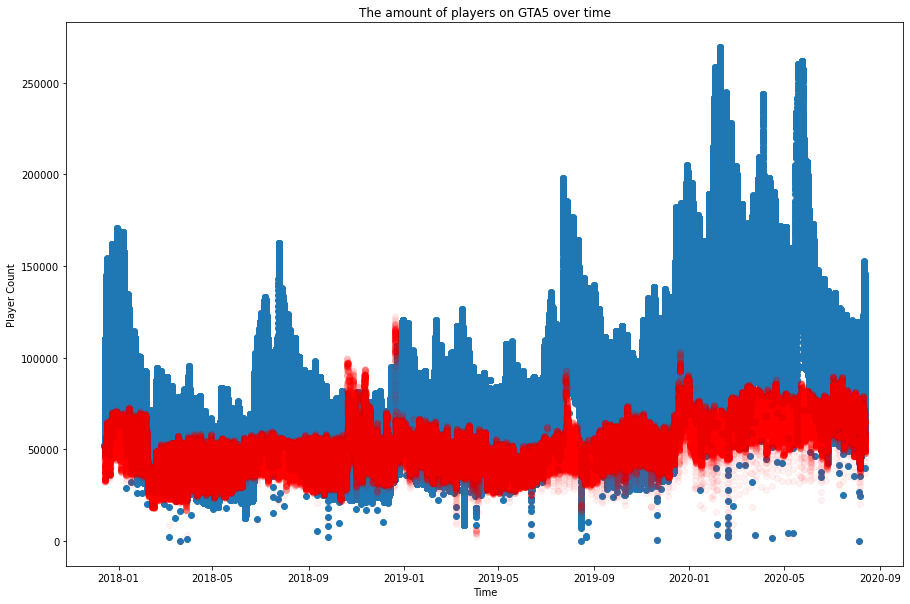

In [25]:
fig6, ax6 = plt.subplots(1, 1, figsize = (15, 10))
ax6.scatter(gta5_nozeros['Time'], gta5_nozeros['Playercount'])
ax6.scatter(tf2_nozeros['Time'], tf2_nozeros['Playercount'], color = 'red', alpha = .05)
ax6.set_xlabel("Time")
ax6.set_ylabel("Player Count")
ax6.set_title("The amount of players on GTA5 over time")
plt.show()

### Comparing Counter-Strike:Global Offensive's Data With Itself
On December 6, 2018 Valve made a decision to make their fifteen dollar first-person shooter game free-to-play. Since we have just compared two different titles to each other, one being pay-to-play and the other being free; I thought it would be interesting to look at a game that has done both. So I am going to take CSGO's data and restrict it so that the data is cut off before December 6th 2018 00:00:00 and after. This way we can look at the player-count at the exact times it was for sale and when it was free.

In [26]:
game_info[2:3]

,appid,type,name,releasedate,freetoplay
2,730,game,Counter-Strike: Global Offensive,2012-08-21,1.0


In [27]:
csgo = pd.read_excel('730.xlsx')

In [28]:
csgo_play_count = csgo.fillna(value = 0)

In [29]:
csgo_nozeros = csgo_play_count[csgo_play_count['Playercount'] > 0]

In [30]:
csgo_nozeros.head()

,Time,Playercount
0,2017-12-14 00:00:00,234777.0
1,2017-12-14 00:05:00,231207.0
2,2017-12-14 00:10:00,227385.0
3,2017-12-14 00:15:00,224399.0
4,2017-12-14 00:20:00,221544.0


In [31]:
csgo_nozeros['Time'].head()

0   2017-12-14 00:00:00
1   2017-12-14 00:05:00
2   2017-12-14 00:10:00
3   2017-12-14 00:15:00
4   2017-12-14 00:20:00
Name: Time, dtype: datetime64[ns]

In [32]:
from datetime import datetime as dt

In [33]:
players_before_dec6 = csgo_nozeros[csgo_nozeros['Time'] < '2018-12-06 00:00:00']

In [34]:
players_before_dec6

,Time,Playercount
0,2017-12-14 00:00:00,234777.0
1,2017-12-14 00:05:00,231207.0
2,2017-12-14 00:10:00,227385.0
3,2017-12-14 00:15:00,224399.0
4,2017-12-14 00:20:00,221544.0
...,...,...
102811,2018-12-05 23:35:00,248989.0
102812,2018-12-05 23:40:00,245873.0
102813,2018-12-05 23:45:00,243045.0
102814,2018-12-05 23:50:00,240061.0


Below we can see that stats regarding average player count and the minimum player-count as well as the maximum. The first three lines of code are displaying the player-count stats before CSGO was free-to-play while the three lines of code under the table are displaying the player-count stats after the game became free-to-play.

In [35]:
csgo_player_before = stats.describe(players_before_dec6['Playercount'])

In [36]:
csgo_player_before.mean

316217.8963145205

In [37]:
csgo_player_before.minmax

(526.0, 719298.0)

In [38]:
players_after_dec6 = csgo_nozeros[csgo_nozeros['Time'] > '2018-12-06 00:00:00']

In [39]:
players_after_dec6

,Time,Playercount
102817,2018-12-06 00:05:00,233510.0
102818,2018-12-06 00:10:00,231131.0
102819,2018-12-06 00:15:00,226992.0
102820,2018-12-06 00:20:00,226984.0
102821,2018-12-06 00:25:00,225357.0
...,...,...
280219,2020-08-12 23:35:00,454536.0
280220,2020-08-12 23:40:00,450073.0
280221,2020-08-12 23:45:00,450198.0
280222,2020-08-12 23:50:00,451438.0


In [40]:
csgo_player = stats.describe(players_after_dec6['Playercount'])

In [41]:
csgo_player.mean

496736.83375224826

In [42]:
csgo_player.minmax

(745.0, 1308963.0)

### Comparing Counter-Strike:Global Offensive's Data Before it was Free-to-Play and After
CS:GO is one of most played Steam games of all time as we saw above and I thought it would be interesting to compare a game's player-count to itself that way there are less factors contributing to the data. At first you would think that it is a no-brainer that a game becoming free-to-play rather than being fifteen dollars would jump in player-count. However, there was some controversy surrounding Valve and their decision to make their game free-to-play such as veteran users being upset they paid money, concerns about a potential influx in botting or cheating accounts, etc. These factors could play a role in how the player base reacts and makes their decision on whether they want to continue spending time on the game or not. However, we can easily see that wasn't the case here. CS:GO's player-count shot up to an average of 180,519 more players once it became a free-to-play title and reached a maximum concurrent player-count of 1,308,963 players.

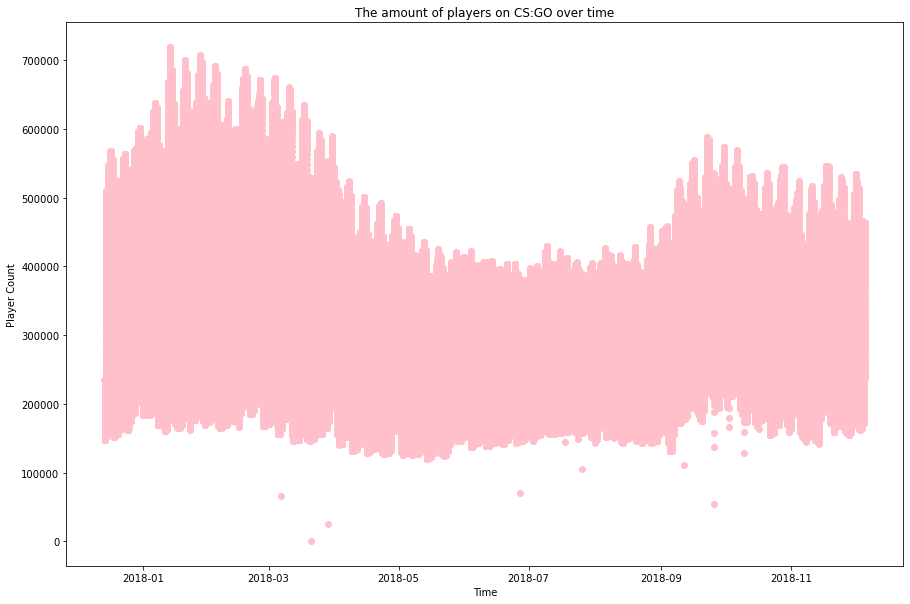

In [43]:
fig3, ax3 = plt.subplots(1, 1, figsize = (15, 10))
ax3.scatter(players_before_dec6['Time'], players_before_dec6['Playercount'], color = 'pink')
ax3.set_xlabel("Time")
ax3.set_ylabel("Player Count")
ax3.set_title("The amount of players on CS:GO over time")
plt.show()

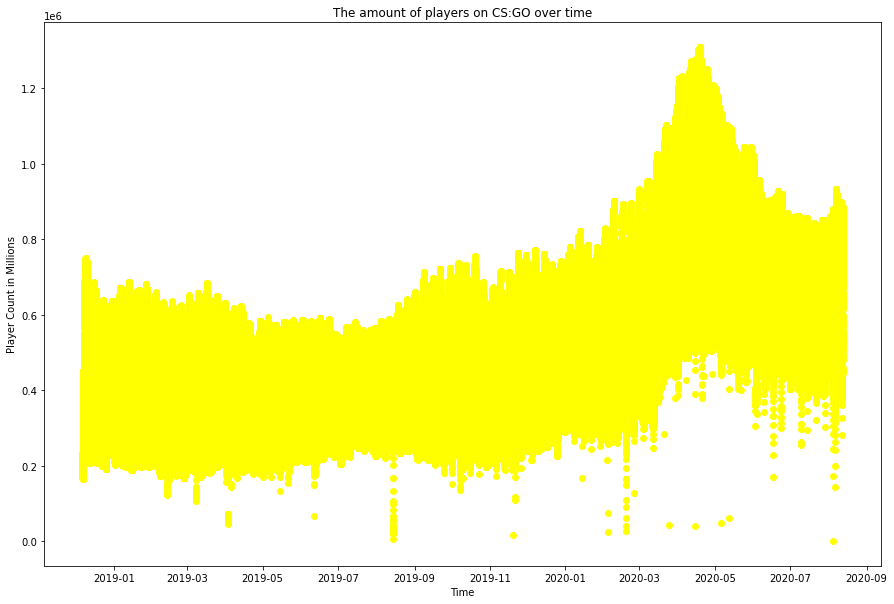

In [50]:
fig4, ax4 = plt.subplots(1, 1, figsize = (15, 10))
ax4.scatter(players_after_dec6['Time'], players_after_dec6['Playercount'], color = 'yellow')
ax4.set_xlabel("Time")
ax4.set_ylabel("Player Count in Millions")
ax4.set_title("The amount of players on CS:GO over time")
plt.show()

### Conclusion
This analysis in no way proves that free-to-play titles are more capable of holding higher player-counts. With all of the factors that could go into why a certain user would want to play a video it would be impossible to get a perfect explanation as to why there are differing player counts. One could theorize as to why some events may have occurred like I did in this analysis, but there isn't enough data available to cover all of the factors as to why more people may be playing free-to-play titles than pay-to-play. This analysis was made too get a little more insight and knowledge as to how a free-to-play game might attract more players. After all, the video game market seems to be favoring a more free-to-play platform with micro-transactions and this can kind of be seen within the CSGO data.